# MA3K7 Assignment 3 #

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Attack Phase ##

In [91]:
#Creating a way to simulate the game process
size = 3 

hat = [n + 1 for n in range(size)]

while len(hat) != 1:
    take1 = hat[np.random.randint(0, len(hat))]
    hat.remove(take1)
    take2 = hat[np.random.randint(0, len(hat))]
    hat.remove(take2)
    difference = abs(take1 - take2)
    hat.append(difference)

print(hat)

[0]


In [95]:
#want to do lots of simulations
sims = 10000
size = 2
end_papers = []

for j in range(sims):
    hat = [n+1 for n in range(size)]
    while len(hat) != 1:
        take1 = hat[np.random.randint(0, len(hat))]
        hat.remove(take1)
        take2 = hat[np.random.randint(0, len(hat))]
        hat.remove(take2)
        difference = abs(take1 - take2)
        hat.append(difference)
    end_papers += hat

#print(end_papers)

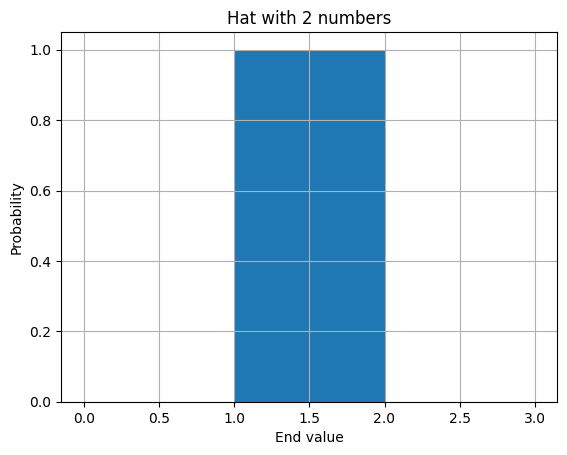

In [90]:
#plot results

plt.hist(end_papers, density = True, bins = [0,1,2,3])
plt.title('Hat with 2 numbers')
plt.ylabel('Probability')
plt.xlabel('End value')
plt.grid()
plt.show()

exactly what I expected

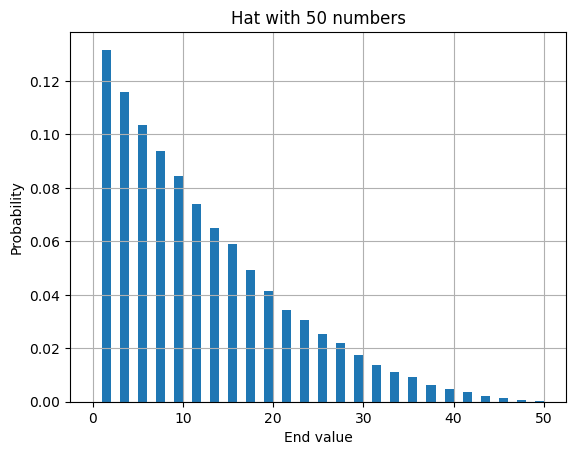

In [74]:
#try other values to specialise

sims = 50000
size = 50
end_papers = []

for j in range(sims):
    hat = [n+1 for n in range(size)]
    while len(hat) != 1:
        take1 = hat[np.random.randint(0, len(hat))]
        hat.remove(take1)
        take2 = hat[np.random.randint(0, len(hat))]
        hat.remove(take2)
        difference = abs(take1 - take2)
        hat.append(difference)
    end_papers += hat

plt.hist(end_papers, density = True, bins = [n for n in range(max(end_papers) + 2)])
plt.title('Hat with 50 numbers')
plt.ylabel('Probability')
plt.xlabel('End value')
plt.grid()
plt.show()

values = set(end_papers)
#print(values)


11.490199999999996


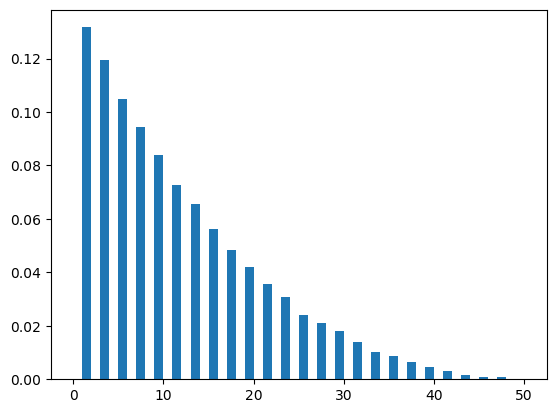

In [36]:
#finding expected value
probs, bins, bars = plt.hist(end_papers, density =True, bins = [n for n in range(max(end_papers) + 2)])
print(sum((np.append(probs,0) * bins)))


0.66804


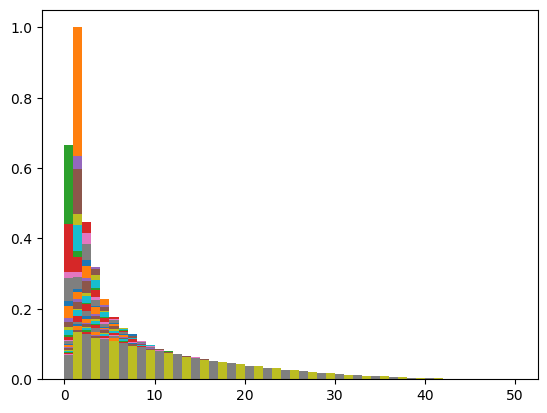

In [44]:
#finding the expected value for games with at most 50 pieces of paper
sims = 50000
expected = []
for i in range(1,50):
    size = i
    end_papers = []
    
    for j in range(sims):
        hat = [n+1 for n in range(size)]
        while len(hat) != 1:
            take1 = hat[np.random.randint(0, len(hat))]
            hat.remove(take1)
            take2 = hat[np.random.randint(0, len(hat))]
            hat.remove(take2)
            difference = abs(take1 - take2)
            hat.append(difference)
        end_papers += hat
    
    probs, bins, bars = plt.hist(end_papers, density =True, bins = [n for n in range(max(end_papers) + 2)])
    expected += [sum((np.append(probs,0) * bins))]

print(expected[2])

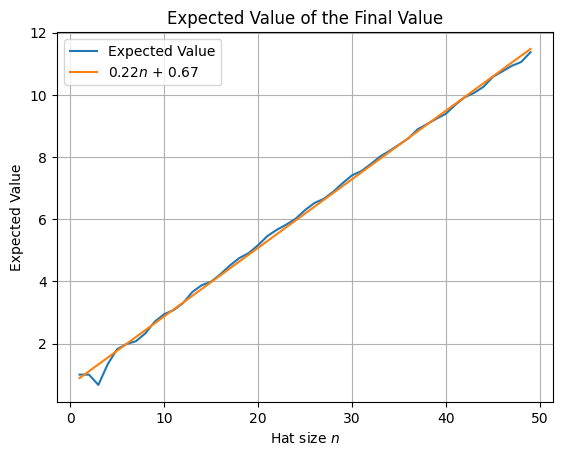

In [62]:
#calculate linear regression
slope, intercept, r, p, std_err = stats.linregress([n+1 for n in range(len(expected))], expected)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, [n+1 for n in range(len(expected))]))

plt.plot([n+1 for n in range(len(expected))], expected, label = "Expected Value")
plt.plot([n+1 for n in range(len(expected))],mymodel, label = f"{round(slope,2)}$n$ + {round(intercept,2)}")
plt.title('Expected Value of the Final Value')
plt.ylabel('Expected Value')
plt.legend()
plt.xlabel('Hat size $n$')
plt.grid()
plt.show()

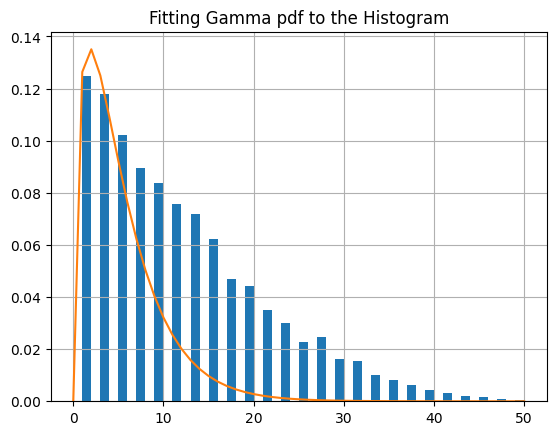

In [87]:
## Trying to fit the distribution ##

#Gamma distribution
alpha = 1.5
rate = 0.28

def pdf_gamma(x):
    return stats.gamma.pdf(x, a = alpha, scale = 1/rate)

x = np.linspace(0,size, size + 1)

plt.hist(end_papers, density = True, bins = [n for n in range(max(end_papers) + 2)])
plt.plot(x, pdf_gamma(x))
plt.title('Fitting Gamma pdf to the Histogram')
plt.grid()
plt.show()

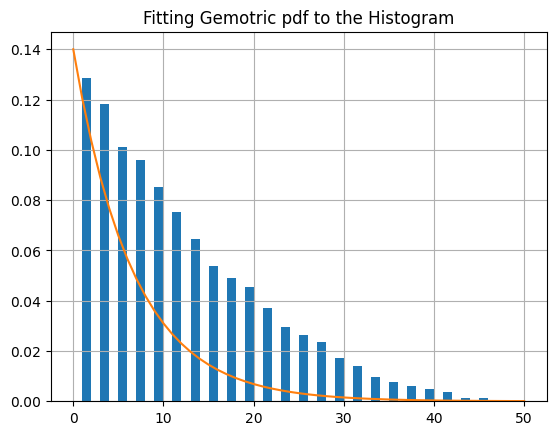

In [94]:
#Geometric Distribution
def pdf_geom(p,size):
    y = []
    for k in range(size + 1):
        y.append(( (1 - p) ** k ) * p)
    return y

p = 0.14

plt.hist(end_papers, density = True, bins = [n for n in range(max(end_papers) + 2)])
plt.plot(x, pdf_geom(p, size))
plt.title('Fitting Gemotric pdf to the Histogram')
plt.grid()
plt.show()

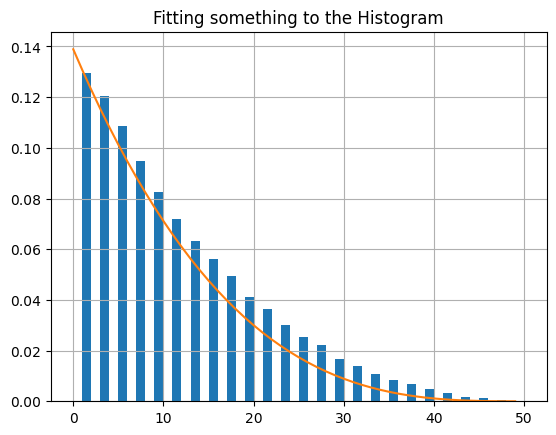

In [12]:
#Trying to find some function to fit the data
x = np.array([n for n in range(50)])
y = (-1/900000) * (x-50)**3 

plt.hist(end_papers, density = True, bins = [n for n in range(max(end_papers) + 2)])
plt.plot(x, y)
plt.title('Fitting something to the Histogram')
plt.grid()
plt.show()